In [1]:
# def get_directed_edge_index(num_nodes, edge_idx):
#     from_idx = []
#     to_idx = []
#
#     for i in range(0,num_nodes-1):
#         # to_idx = [i]
#         try:
#             ancestor_nodes, _, self_idx, _ = torch_geometric.utils.k_hop_subgraph(i, num_hops=num_nodes,edge_index=edge_idx)
#             # print (f"ancestor nodes for {i}: {ancestor_nodes}")
#         except:
#             print (f"exception {i, num_nodes, edge_idx}")
#
#         # ancestor_nodes = ancestor_nodes.item()
#         found_nodes = list(ancestor_nodes.numpy())
#         found_nodes.remove(i)
#
#
#         if found_nodes is not None:
#             for node in found_nodes:
#                 to_idx.append(i)
#                 from_idx.append(node)
#
#         children_nodes, _, self_idx, _ = torch_geometric.utils.k_hop_subgraph(i, num_hops=num_nodes,edge_index=edge_idx, flow='target_to_source')
#
#         found_nodes = list(children_nodes.numpy())
#         found_nodes.remove(i)
#         if found_nodes is not None:
#             for node in found_nodes:
#                 to_idx.append(i)
#                 from_idx.append(node)
#
#     return torch.tensor([from_idx, to_idx], dtype=torch.long)
#
#
# # probably slow, could recursively do k-hop subgraph with k = 1 instead
# def get_depth_from_graph(num_nodes, edge_index):
#     from_idx = edge_index[0]
#     to_idx = edge_index[1]
#
#
#     # find source node
#     all_nodes = torch.arange(num_nodes)
#     source_node = [x for x in all_nodes if x not in to_idx]
#
#     assert len(source_node) == 1
#
#     source_node = source_node[0]
#
#     depths = torch.zeros(num_nodes, dtype=torch.long)
#
#     prev_depth_nodes = [source_node]
#
#     for i in range(1, num_nodes):
#         all_i_depth_nodes , _, _, _ = torch_geometric.utils.k_hop_subgraph(source_node.item(), num_hops=i, edge_index=edge_index, flow='target_to_source')
#         i_depth_nodes = [j for j in all_i_depth_nodes if j not in prev_depth_nodes]
#
#         for node_idx in i_depth_nodes:
#             depths[node_idx] = i
#
#         prev_depth_nodes = all_i_depth_nodes
#
#
#     return depths
#
#
# new_dict = {}
# from tqdm import tqdm
# for k,v in tqdm(graph_torch_data['graph_dict'].items()):
#     v['attention_edge_index'] = get_directed_edge_index(len(v['onehot']), torch.LongTensor(v['edge_index']))
#     v['depth'] = get_depth_from_graph(len(v['onehot']), torch.LongTensor(v['edge_index']))
#     new_dict[k] =  v
#
# graph_torch_data['graph_dict'] = new_dict
# torch.save(graph_torch_data,'data/hol4/graph_attention_data/data.pt')

In [73]:
from data.hol4.mongo_to_torch import HOL4DataModuleGraph

In [74]:
module = HOL4DataModuleGraph('data/hol4/graph_attention_data_new')

In [75]:
module.prepare_data()
module.prepare_data()
module.prepare_data()

Generating data from MongoDB..


226213it [00:01, 134027.25it/s]
226213it [00:01, 190066.31it/s]
226213it [00:01, 186830.81it/s]


Adding attention edge index


100%|██████████| 7872/7872 [03:04<00:00, 42.61it/s] 


In [76]:
module.setup("fit")

Setting up data loaders..


In [77]:
max([i for x in module.graph_dict.values() for i in x['edge_attr']])


15

(array([328., 543., 354., 455., 559., 443., 353., 330., 430., 365., 294.,
        263., 265., 220., 210., 157., 134., 123., 140., 131., 104., 106.,
         67.,  75.,  83.,  93.,  58.,  65.,  61.,  45.,  59.,  38.,  30.,
         39.,  44.,  34.,  28.,  41.,  25.,  21.,  34.,  28.,  25.,  22.,
         19.,  13.,  19.,  17.,  18.,   8.,  20.,  17.,  13.,  16.,  18.,
         16.,  14.,   7.,  12.,  12.,   4.,  13.,   9.,   6.,  11.,   6.,
         16.,   4.,  10.,   4.,  13.,   6.,   3.,   9.,   3.,   2.,   3.,
          2.,   2.,   5.,   7.,   5.,   4.,   3.,   5.,   3.,   3.,   4.,
          6.,   2.,   5.,   6.,   3.,   1.,   7.,   1.,   1.,   2.,   5.,
          3.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.

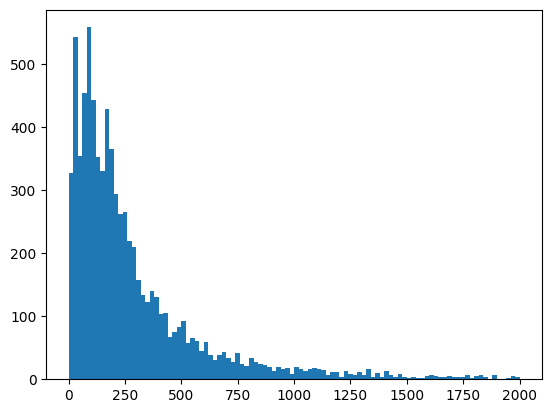

In [72]:
import matplotlib.pyplot as plt
plt.hist([len(x['attention_edge_index'][0]) for x in module.graph_dict.values()], bins=100, range=(0, 2000))

In [58]:
train_loader = module.train_dataloader()

In [59]:
batch = next(iter(train_loader))

In [62]:
batch[0].num_nodes

826

In [46]:
from models.get_model import get_model

In [9]:
%load_ext autoreload

In [10]:
%autoreload 2

In [47]:
sat_config = {
    "model_type": "sat",
    # 'gnn_type': 'di_gcn',
    "num_edge_features":  200,
    "vocab_size":1004,
    "embedding_dim": 256,
    "dim_feedforward": 256,
    "num_heads": 4,
    "num_layers": 2,
    "in_embed": True,
    "se": "formula-net",
    "abs_pe": False,
    "abs_pe_dim": 256,
    "use_edge_attr": True,
    "dropout": 0.,
    "gnn_layers": 3,
    "directed_attention": False,
    'small_inner': True
}


model = get_model(sat_config)

In [48]:
model(batch[0])


tensor([[  1,   6,   8,  ..., 822, 825, 821],
        [  0,   0,   0,  ..., 824, 824, 824]])
torch.Size([13304, 128]) torch.Size([13304, 128]) torch.Size([13304, 128]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) torch.Size([13304]) None 826
torch.Size([13304, 128]) torch.Size([13304, 128]) torch.Size([13304, 128]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) torch.Size([13304]) None 826


tensor([[0.7241, 1.6973, 1.4417,  ..., 0.6779, 1.5508, 0.3504],
        [0.6085, 1.4330, 0.7217,  ..., 1.0594, 1.0948, 0.7711],
        [0.6139, 0.4275, 1.4856,  ..., 0.3846, 0.7700, 0.6462],
        ...,
        [0.7802, 0.5756, 0.7805,  ..., 0.7552, 1.3187, 0.4251],
        [0.6135, 1.6567, 0.7656,  ..., 0.8805, 1.3436, 0.3903],
        [0.7466, 0.7009, 0.6175,  ..., 0.6911, 0.4044, 0.5398]],
       grad_fn=<ScatterReduceBackward0>)

In [45]:
batch[0].attention_edge_index[1][:15]



tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
batch[0].ptr

tensor([  0,  48, 101, 113, 124, 131, 142, 168, 239, 252, 295, 305, 325, 346,
        391, 400, 419, 447, 464, 511, 519, 541, 562, 581, 625, 636, 686, 708,
        748, 772, 786, 819, 826])

In [ ]:
import torch
import